In [1]:
%load_ext autoreload
%autoreload 2
from autoseg.datasets import GunpowderZarrDataset
from autoseg.config import read_config
from torch.utils.data import DataLoader
from autoseg.datasets.utils import multisample_collate as collate
from autoseg.train_utils import get_2D_snapshot
from autoseg.models import Model

/home/anton/miniforge3/envs/segmentation/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
import random
random.seed(1000)

In [3]:
def dataloader_from_config(dataset, config):
    if config["parallel"]:
        return DataLoader(
            dataset=dataset,
            collate_fn=collate,
            batch_size=config["batch_size"],
            num_workers=config["num_workers"],
            prefetch_factor=config["precache_per_worker"],
            pin_memory=True,
        )
    else:
        return DataLoader(
            dataset=dataset,
            collate_fn=collate,
            batch_size=config["batch_size"],
            pin_memory=True,
        )

In [4]:
def get_image_for_scale(scale="s0"):
  config = read_config("autoseg/user_configs/experiments/resolution_experiments/" + scale)
  dataset = GunpowderZarrDataset(
    config=config["pipeline"],
    input_image_shape=config["training"]["train_dataloader"]["input_image_shape"],
    output_image_shape=config["training"]["train_dataloader"]["output_image_shape"],
  )
  it = iter(dataset)
  sample = next(it)
  outputs = {name: val for name, val in zip(config["training"]["batch_outputs"], sample)}
  o = {}
  for key in ["raw"]:
    o[key] = outputs[key]
  images = get_2D_snapshot(o)
  return images[0]

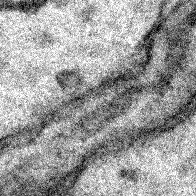

In [5]:
get_image_for_scale("s0")

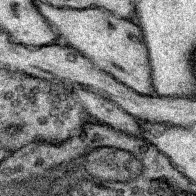

In [6]:
get_image_for_scale("s1")

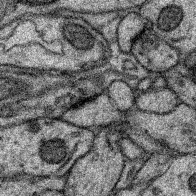

In [7]:
get_image_for_scale("s2")

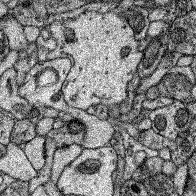

In [8]:
get_image_for_scale("s3")

In [3]:
import json
config = read_config("autoseg/user_configs/anton/baselines/unet_lsd_ln_act")
json.dump(config, open("unet_lsd.json", "w"), indent=4)


In [4]:
model = Model(config)

LayerNorm
LayerNorm
LayerNorm
LayerNorm
LayerNorm
LayerNorm
LayerNorm
LayerNorm
LayerNorm
LayerNorm
LayerNorm
LayerNorm
LayerNorm
LayerNorm


In [5]:
model

Model(
  (model): ConfigurableUNet(
    (unet): UNet(
      (l_conv): ModuleList(
        (0): ConvPass(
          (conv_pass): Sequential(
            (0): Conv3d(1, 12, kernel_size=(3, 3, 3), stride=(1, 1, 1))
            (1): LayerNorm((12,), eps=1e-05, elementwise_affine=True)
            (2): GELU(approximate='none')
            (3): Conv3d(12, 12, kernel_size=(3, 3, 3), stride=(1, 1, 1))
            (4): LayerNorm((12,), eps=1e-05, elementwise_affine=True)
            (5): GELU(approximate='none')
          )
        )
        (1): ConvPass(
          (conv_pass): Sequential(
            (0): Conv3d(12, 60, kernel_size=(3, 3, 3), stride=(1, 1, 1))
            (1): LayerNorm((60,), eps=1e-05, elementwise_affine=True)
            (2): GELU(approximate='none')
            (3): Conv3d(60, 60, kernel_size=(3, 3, 3), stride=(1, 1, 1))
            (4): LayerNorm((60,), eps=1e-05, elementwise_affine=True)
            (5): GELU(approximate='none')
          )
        )
        (2): ConvPa

In [22]:
params = sum(p.numel() for p in model.parameters() if p.requires_grad)
print(f"{params:,}")

146,547,331


In [13]:
config = read_config("autoseg/user_configs/anton/baselines/baseline_unet")

In [14]:
dataset = GunpowderZarrDataset(
    config=config["pipeline"],
    input_image_shape=config["training"]["train_dataloader"]["input_image_shape"],
    output_image_shape=config["training"]["train_dataloader"]["output_image_shape"],
)

/home/anton/.cache/autoseg/datasets/SynapseWeb/kh2015/data/apical.zarr.zip labels/s0
/home/anton/.cache/autoseg/datasets/SynapseWeb/kh2015/data/apical.zarr.zip labels_mask/s0
/home/anton/.cache/autoseg/datasets/SynapseWeb/kh2015/data/apical.zarr.zip raw/s0


In [15]:
it = iter(dataset)

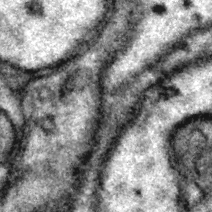

In [22]:
sample = next(it)
outputs = {name: val for name, val in zip(config["training"]["batch_outputs"], sample)}
o = {}
for key in ["raw"]:
  o[key] = outputs[key]
images = get_2D_snapshot(o)
images[0]

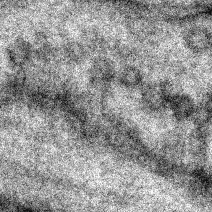

In [49]:
images[0]

In [12]:
def size_of_sample(sample):
  size = 0
  for arr in sample:
    size += arr.itemsize * arr.size
  size /= 1024**2
  print("Size of train data: {:.2f} MB".format(size))

In [11]:
80*8*2*12.5

16000.0

In [29]:
root_config = config
dataloader = DataLoader(
    dataset=dataset,
    collate_fn=collate,
    batch_size=1,
    #num_workers=80,
    #prefetch_factor=1,
    #pin_memory=True,
) 

In [21]:
dataset.pipeline

ZarrSource[/home/anton/.cache/autoseg/datasets/SynapseWeb/kh2015/data/apical.zarr.zip] -> Pad -> Pad -> Pad -> RandomLocation -> RandomProvider -> Normalize -> ElasticAugment -> SimpleAugment -> NoiseAugment -> IntensityAugment -> SmoothArray -> GrowBoundary -> AddAffinities -> BalanceLabels -> IntensityScaleShift -> Unsqueeze -> AddLocalShapeDescriptor -> PreCache

In [16]:
size_of_sample(next(iter(dataset)))

KeyboardInterrupt: 

In [15]:
size_of_sample(next(iter(dataloader)))

KeyboardInterrupt: 

In [23]:
import time
time.time()

1712374824.3981225

In [30]:
times = []
ctime = time.time()
for _, item in zip(range(30), dataloader):
  times.append(time.time() - ctime)
  ctime = time.time()

In [31]:
times

[12.127687215805054,
 0.6691429615020752,
 0.024767160415649414,
 0.09588837623596191,
 0.03594064712524414,
 0.03450131416320801,
 0.04183483123779297,
 0.11114883422851562,
 0.0303957462310791,
 0.03244757652282715,
 0.04220128059387207,
 0.027881860733032227,
 0.03441596031188965,
 0.14933562278747559,
 0.047514915466308594,
 0.0264284610748291,
 0.06777691841125488,
 0.024513721466064453,
 0.025088071823120117,
 0.060639381408691406,
 0.07320404052734375,
 0.05577683448791504,
 0.039203643798828125,
 0.04550790786743164,
 0.0243532657623291,
 0.023482799530029297,
 0.021941184997558594,
 0.03011322021484375,
 0.02900862693786621,
 0.032820701599121094]

In [32]:
sum(times)

14.084963083267212

In [ ]:
times

[22.771594285964966,
 0.6140687465667725,
 10.932597637176514,
 0.30176496505737305,
 12.360710620880127,
 0.014486312866210938,
 11.684767723083496,
 0.02010178565979004,
 12.251955032348633,
 1.0751118659973145]